In [171]:

import TickLoader

import numpy as np
import pandas as pd
import datetime as dt
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from IPython import get_ipython
import matplotlib.mlab as mlab



In [172]:
hrs=['03:45:01','10:54:59']
start_datetime = '2017-10-01 '+hrs[0]
end_datetime = '2017-10-10 '+hrs[1]
symbols=['CC  FMZ0017!','C   FMZ0017!','6BZ7']


In [173]:
Raw_data_US=TickLoader.raw_ticks_dataframe(symbols[0], start_datetime, end_datetime,books_type='direct')

Raw_data_UK=TickLoader.raw_ticks_dataframe(symbols[1], start_datetime, end_datetime,books_type='direct')
Raw_data_GBP=TickLoader.raw_ticks_dataframe(symbols[2], start_datetime, end_datetime,books_type='direct')

data_US=Raw_data_US.resample('1S').last()
data_UK=Raw_data_UK.resample('1S').last()
data_GBP=Raw_data_GBP.resample('1S').last()

data_US = data_US.drop(['symbol','instrumentId','trade_price','trade_size','bid_orders','ask_orders'], 1)
data_US = data_US.rename(columns={'bid_price': 'US_bid_price','ask_price': 'US_ask_price','bid_size': 'US_bid_size',
                                 'ask_size': 'US_ask_size', 'mid': 'US_mid', 'wtd_mid': 'US_wtd_mid'})

data_UK = data_UK.drop(['symbol','instrumentId','trade_price','trade_size','bid_orders','ask_orders'], 1)
data_UK = data_UK.rename(columns={'bid_price': 'UK_bid_price','ask_price': 'UK_ask_price','bid_size': 'UK_bid_size',
                                 'ask_size': 'UK_ask_size', 'mid': 'UK_mid', 'wtd_mid': 'UK_wtd_mid'})

data_GBP = data_GBP.drop(['symbol','instrumentId','trade_price','trade_size','bid_orders','ask_orders'], 1)
data_GBP = data_GBP.rename(columns={'bid_price': 'GBP_bid_price','ask_price': 'GBP_ask_price','bid_size': 'GBP_bid_size',
                                 'ask_size': 'GBP_ask_size', 'mid': 'GBP_mid', 'wtd_mid': 'GBP_wtd_mid'})


dataDF=pd.concat([data_US,data_UK,data_GBP],axis=1, join='inner')
dataDF=dataDF.dropna(axis=0,how='any')

In [174]:
#dataDF=dataDF.assign(arb_mid=US_wtd_mid.values)
#dataDF('arb_mid')=dataDF('US_wtd_mid')

arb_mid=dataDF.US_wtd_mid-dataDF.UK_wtd_mid*dataDF.GBP_wtd_mid/10000
arb_bid=dataDF.US_bid_price-dataDF.UK_ask_price*dataDF.GBP_wtd_mid/10000
arb_ask=dataDF.US_ask_price-dataDF.UK_bid_price*dataDF.GBP_wtd_mid/10000
arb_bid_ask_spread=arb_ask-arb_bid
t=range(1,len(arb_mid)+1)


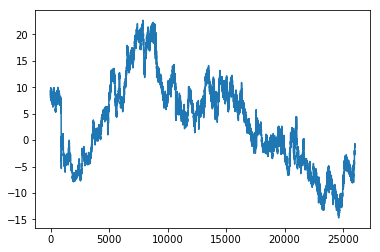

In [175]:
plt.plot(t,arb_mid)
plt.show()





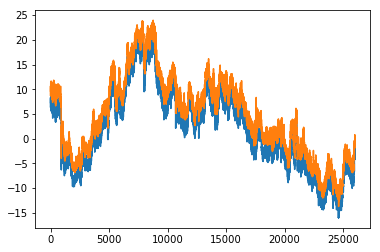

In [176]:
plt.plot(t,arb_bid,t,arb_ask)
plt.show()

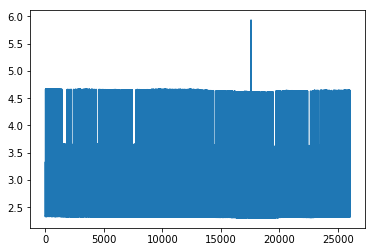

In [177]:
plt.plot(t,arb_bid_ask_spread)
plt.show()

In [178]:
print "min:" 
print arb_bid_ask_spread.min()
print "max:" 
print arb_bid_ask_spread.max()
print "mean:" 
print arb_bid_ask_spread.mean()
print "median:" 
print arb_bid_ask_spread.median()



min:
2.30562
max:
5.92967272727
mean:
2.84540431639
median:
2.33034463602


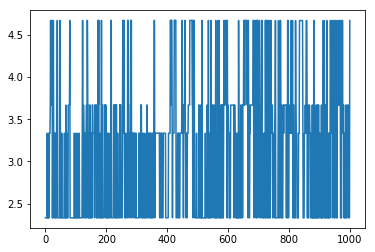

In [179]:
x=range(1000)
plt.plot(x,arb_bid_ask_spread.head(1000))
plt.show()


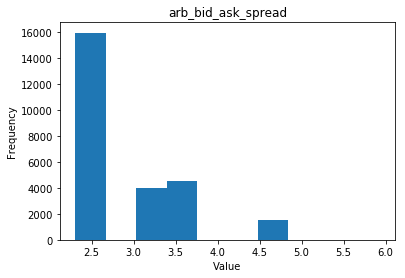

In [180]:

plt.hist(arb_bid_ask_spread)
plt.title("arb_bid_ask_spread")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()



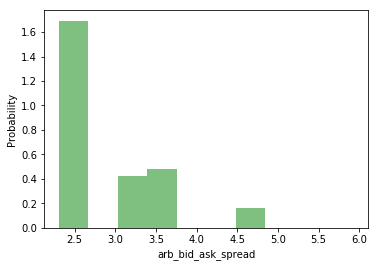

In [181]:
fig = plt.figure()

num_bins = 10
# the histogram of the data
n, bins, patches = plt.hist(arb_bid_ask_spread, num_bins, normed=100, facecolor='green', alpha=.5)
plt.xlabel('arb_bid_ask_spread')
plt.ylabel('Probability')

# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15)
plt.show()


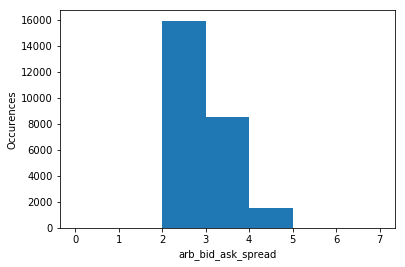

In [182]:
numpy_hist = plt.figure()

plt.hist(arb_bid_ask_spread, bins=[0,1,2,3,4,5,6,7])
plt.xlabel('arb_bid_ask_spread')
plt.ylabel('Occurences')

plt.show()



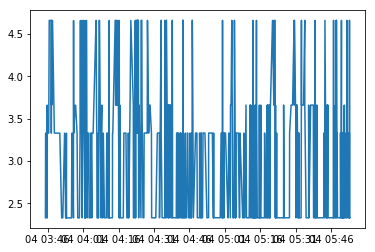

In [186]:
day=arb_bid_ask_spread['2017-10-04 03:45:00':'2017-10-04 05:54:00']
plt.plot(day)
plt.show()



